# Valenbici

<img src="./img/valenbici.jpg">

- http://www.valenbisi.es/service/carto/json
- http://www.valenbisi.es/service/stationdetails/valence/63

### EJERCICIOS
1. Obtener la cantidad de estaciones que tienen 30 plazas disponibles (campo TOTAL = 30).
2. Código de estación con la media más alta de bicicletas disponibles (campo AVAILABLE con media más alta).
3. Histograma de bicicletas disponibles de la estación obtenida en el apartado 2.
4. Realizar el gráfico con la línea temporal de bicicletas disponibles de la estación obtenida en el apartado 2. Posiblemente se deba cambiar el índice a un tipo FECHA


In [1]:
import pandas as pd

In [4]:
from os import path
bicis_path = path.join('datasets','estaciones_bici.csv')

In [6]:
bicis = pd.read_csv(bicis_path, sep=';')
bicis.head()

,Unnamed: 0,_id,available,connected,download_date,station,free,open,ticket,total,updated
0,0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000


In [8]:
data = bicis[['station', 'total', 'updated', 'free']]

In [9]:
display(data.head())

,station,total,updated,free
0,64,20,2019-02-10 17:21:13.000,11
1,73,20,2019-02-10 17:24:13.000,14
2,63,20,2019-02-10 18:09:16.000,0
3,64,20,2019-02-10 18:12:15.000,14
4,65,19,2019-02-10 18:09:16.000,10


In [10]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27547 entries, 0 to 27546
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   station  27547 non-null  int64 
 1   total    27547 non-null  int64 
 2   updated  27547 non-null  object
 3   free     27547 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 861.0+ KB


None

In [11]:
display(data.describe(include='all'))

,station,total,updated,free
count,27547.000000,27547.000000,27547,27547.000000
unique,NaN,NaN,537,NaN
top,NaN,NaN,2019-02-11 09:12:14.000,NaN
freq,NaN,NaN,180,NaN
mean,138.449196,19.915381,NaN,10.629397
std,79.657747,5.570912,NaN,7.492671
min,1.000000,10.000000,NaN,0.000000
25%,69.000000,15.000000,NaN,4.000000
50%,139.000000,20.000000,NaN,10.000000
75%,207.000000,20.000000,NaN,15.000000


## 1. Obtener la cantidad de estaciones que tienen 30 plazas disponibles (TOTAL = 30)

In [14]:
total_estaciones_30_plazas = len(bicis[bicis['total'] == 30])
print(f"Número de estaciones con 30 plazas: {total_estaciones_30_plazas}")

Número de estaciones con 30 plazas: 1098


## 2. Código de estación con la media más alta de bicicletas disponibles (AVAILABLE con media más alta)

In [18]:
media_por_estacion = bicis.groupby("_id")["available"].mean()
estacion_media_alta = media_por_estacion.idxmax()
print(f"Código de estación con la media más alta: {estacion_media_alta}")

Código de estación con la media más alta: 5c611ce525541729b7d53944


## 3. Histograma de bicicletas disponibles de la estación obtenida en el apartado 2.

<Axes: >

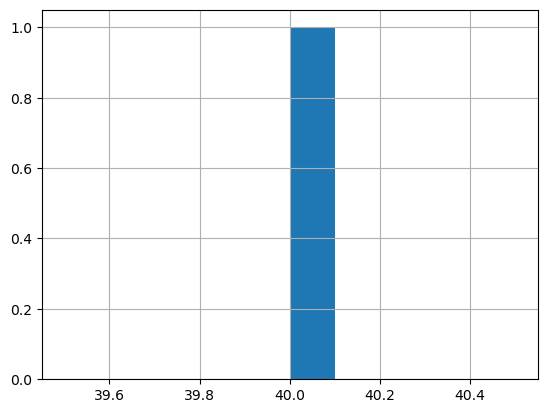

In [19]:
bicis[bicis["_id"] == estacion_media_alta]["available"].hist()

## 4. Gráfico con la línea temporal de bicicletas disponibles de la estación obtenida en el apartado 2.

<Axes: xlabel='updated'>

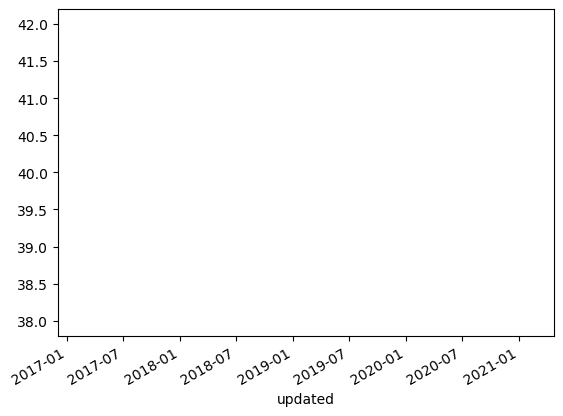

In [25]:
bicis["updated"] = pd.to_datetime(bicis["updated"])
df_estacion = bicis[bicis["_id"] == estacion_media_alta]
df_estacion.set_index("updated")["available"].plot()